# Descriptive Statistics Review

In this second part of the lab, we are going to continue working with the data that we cleaned in the last part. 
Be sure to continue to write clean code and comment your work well!

First, lets import our libraries and the data we saved. 

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
diamonds = pd.read_csv('diamonds_clean.csv')
diamonds = diamonds.drop('Unnamed: 0', axis=1)

Now that we cleaned our data, we can proceed with some exploratory analysis. We will analyze the features that affect price the most.

Let's start by looking at how the charateristics of a diamond (especially the price, since that's our focus) change based on its color. Remember that you can use the `groupby()` method in pandas. 

**Using the `describe()` method, take a look on the dataset paying special attention to the variability. Comment what you see.**

In [3]:
#your code here
diamonds.describe()

,Unnamed: 0.1,carat,color,clarity,depth,table,price,x,y,z
count,53939.000000,53939.000000,53939.000000,53939.000000,53939.000000,53939.000000,53939.000000,53931.000000,53932.000000,53932.000000
mean,26970.553811,0.797917,3.405829,3.051058,61.749458,57.457192,3932.646267,5.731964,5.733907,3.539623
std,15571.420425,0.473987,1.701110,1.647128,1.432582,2.234510,3989.317520,1.119634,1.111750,0.691807
min,1.000000,0.200000,0.000000,0.000000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,13485.500000,0.400000,2.000000,2.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26971.000000,0.700000,3.000000,3.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.500000,1.040000,5.000000,4.000000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,11.419579,6.980000


In [4]:
#your comments here
"""price has a huge variability"""

'price has a huge variability'

Let's proceed to check each feature separately. 

**Before starting, which features do you think that will affect the price most and why? You will contrast your hypotheses with your results.**

In [5]:
#your hypotheses here
"""
I think the carat will have the biggest influence
"""

'\nI think the carat will have the biggest influence\n'

## 1. The `color` column
First, let's look at the color column.

**For each different color, find the mean of each column. You should have a matrix with every color as rows and the columns `carat`, `clarity`, etc as columns.**

In [6]:
#your code here
colors = diamonds.groupby('color', as_index = False).agg({'price':'mean','carat':'mean','clarity':'mean', 'depth':'mean','table':'mean'})
colors.head(8)

,color,price,carat,clarity,depth,table
0,0,5323.818020,1.162137,2.776353,61.887215,57.812393
1,1,5091.874954,1.026927,2.964035,61.846385,57.577278
2,2,4485.739010,0.911668,2.933879,61.837203,57.517873
3,3,3999.135671,0.771190,3.463425,61.757111,57.288629
4,4,3724.886397,0.736538,3.133934,61.694582,57.433536
5,5,3076.752475,0.657867,2.969889,61.662090,57.491201
6,6,3169.954096,0.657795,2.691513,61.698125,57.404590


**What do you see? Pay special attention to the relationship between price and color.**

In [7]:
#your thoughts here
#data['color'] = data['color'].map({'J':0,'I':1,'H':2,'G':3,'F':4,'E':5,'D':6})
#weird... J which is supposedly the worst color seems to have the best pricing 

Let's go further into the color feature. We will plot the frequency distribution of the diamonds color in our dataset. 

**Plot the distribution and analyze it. Remember that you can use the pandas `plot()` method.**

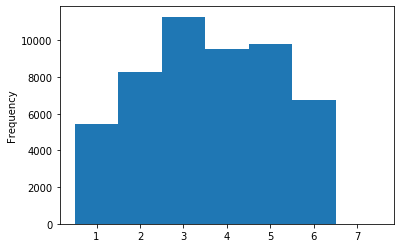

In [8]:
#your code here
diamonds['color'].plot.hist(bins = 7, range = (0.5,7.5) )

In [9]:
#your comments here
"""
most diamonds seem to have colors between [3-5].

color 1 seems to have the lowest frequency. 
"""

'\n\n'

## 2.The `carat` column 

Let's check the `carat` (weight), since this could also be a potential factor for price change.

**Find the mean of each column for each value of `carat` using the `groupby` method. Then comment your results.**

In [10]:
#your code here
carats = diamonds.groupby('carat', as_index = False).agg({'price':'mean','color':'mean','clarity':'mean', 'depth':'mean','table':'mean'})
carats.head(20)

,carat,price,color,clarity,depth,table
0,0.20,365.166667,5.166667,2.833333,61.100000,59.333333
1,0.21,380.222222,5.444444,2.666667,60.511111,58.444444
2,0.22,391.400000,4.800000,2.600000,61.620000,60.400000
3,0.23,486.143345,4.518771,4.901024,61.426621,58.034130
4,0.24,505.185039,4.185039,4.972441,61.599213,57.488189
5,0.25,550.924528,4.146226,4.853774,61.565566,57.363208
6,0.26,550.897233,3.928854,4.723320,61.677470,56.911858
7,0.27,574.759657,4.047210,4.729614,61.599142,56.778970
8,0.28,580.121212,3.898990,4.727273,61.526263,56.863636
9,0.29,601.192308,3.776923,4.638462,61.393077,56.846154


In [11]:
#your comments



**Plot a histogram of the `carat` column by using the `plot` method (see the docs to find an easy way to do so). What is happening?**

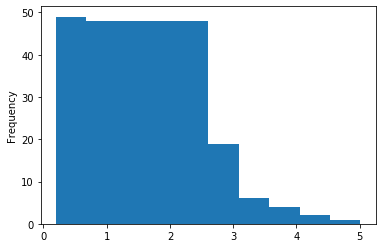

In [12]:
#your code here
carats['carat'].plot.hist()#by = 'carat', r) 

# 3. The `table` and `clarity` column
Finally, let's check the `table`.

**Find the mean of each column for each value of `table` using the `groupby` method. Then comment your results.**

In [13]:
#your code here
table = diamonds.groupby('table', as_index = False).agg({'price':'mean','color':'mean','clarity':'mean', 'depth':'mean','carat':'mean'})
table.head(8)

,table,price,color,clarity,depth,carat
0,43.0,4997.000000,1.000000,4.000000,62.900000,1.040000
1,44.0,474.000000,5.000000,4.000000,62.800000,0.290000
2,49.0,2290.500000,3.000000,3.000000,64.250000,0.650000
3,50.0,8995.500000,3.000000,2.000000,61.500000,1.510000
4,50.1,3353.000000,2.000000,1.000000,66.000000,0.940000
5,51.0,4063.666667,3.222222,2.666667,63.300000,0.883333
6,51.6,13203.000000,0.000000,4.000000,61.000000,2.000000
7,52.0,4342.000000,3.517857,2.892857,62.833929,0.871071


In [14]:
#your comments here
# it doesn't seem like table has any particular correlation with the other variables. 


**Finally, do the same with the `clarity` column.**

In [15]:
#your code here
clarity = diamonds.groupby('clarity', as_index = False).agg({'price':'mean','color':'mean','table':'mean', 'depth':'mean','carat':'mean'})
clarity.head(8)


,clarity,price,color,table,depth,carat
0,0,3924.168691,2.968961,58.303779,62.734278,1.283846
1,1,5062.251169,3.470140,57.927282,61.772479,1.077548
2,2,3996.001148,3.448450,57.662541,61.853042,0.850482
3,3,3924.989395,3.494208,57.417401,61.724417,0.763935
4,4,3839.455391,3.161792,57.315151,61.667458,0.727158
5,5,3283.737071,3.569483,57.024990,61.663778,0.596202
6,6,2523.114637,3.351573,56.884460,61.624651,0.503321
7,7,2864.839106,3.101676,56.507207,61.510615,0.505123


In [16]:
#your comments here

**After looking at your results, which features do you think will affect price the most now? Regarding your hypotheses, do they match your final results? Provide a small overview.**

In [17]:
#your thoughts here

# 4. Taking a deeper look with plots and correlations

To take deeper look, we will use the `pairplot` method of `seaborn` library. This method plots a scatterplot for each pair of features and in the diagonal the distribution of the feature.

So if you have many features it will take a while, be careful!


/home/jose/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/jose/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


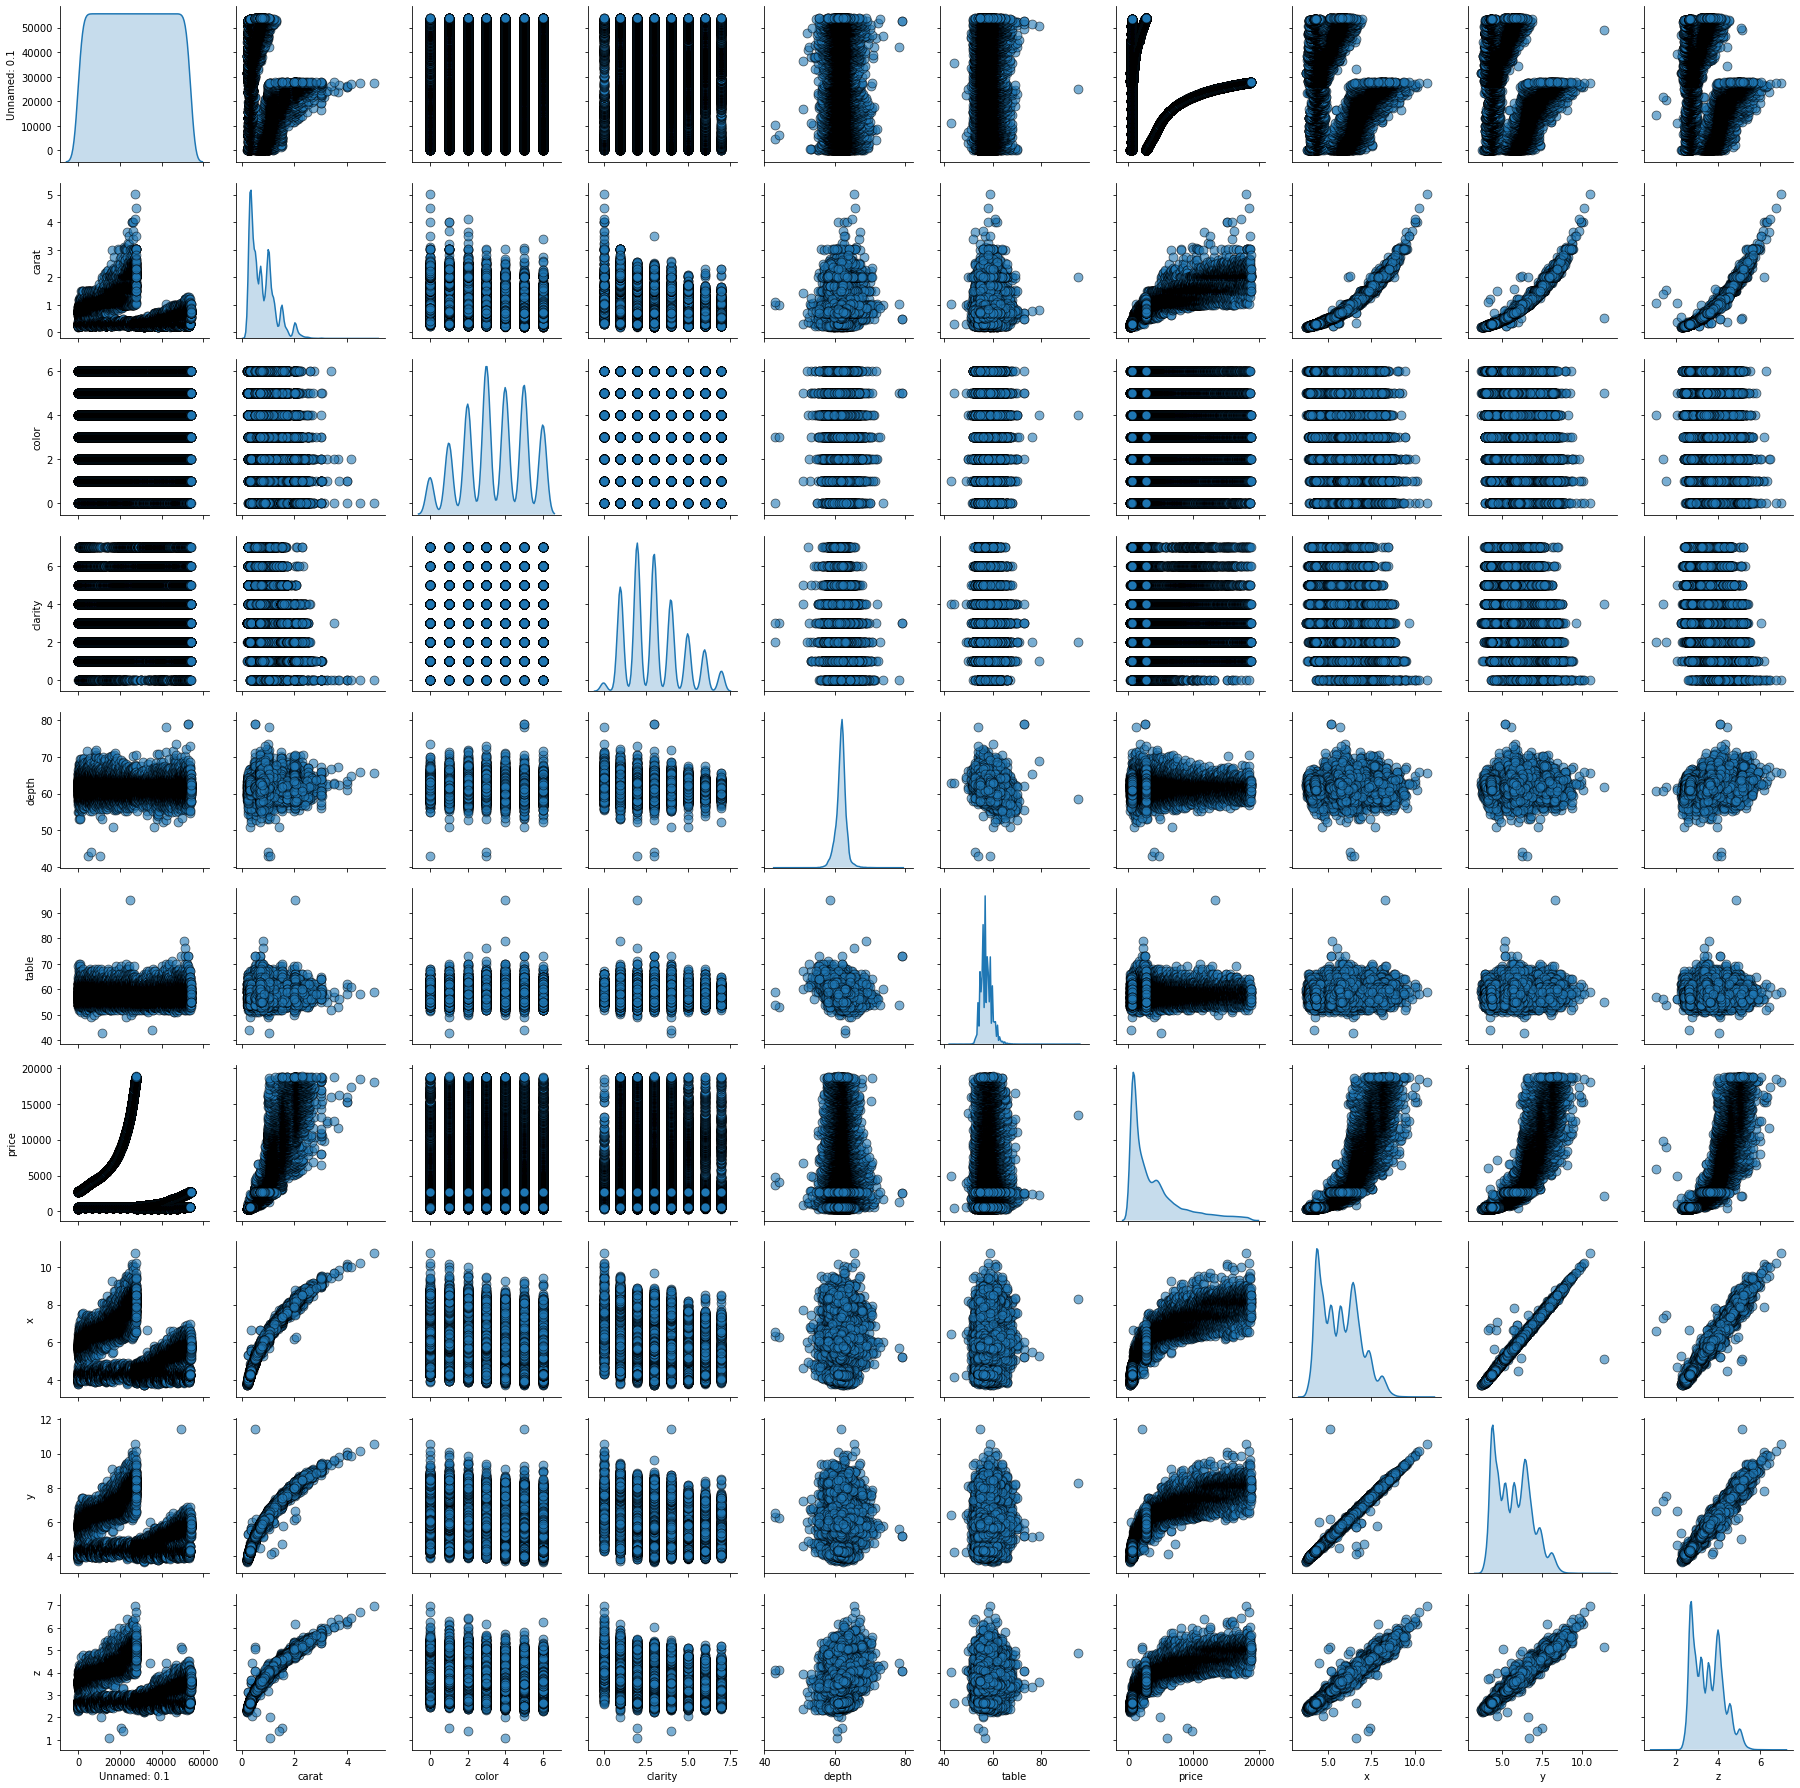

In [18]:
#Run this code
import seaborn as sns
sns.pairplot(diamonds, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

**What do you see here? What relationships between variables are the most interesting?**

In [19]:
#your thoughts here
# carat seems to have arelationshop with price, x, y,z 
# all the dimensions x,y,z are correlated between themselves and price.

Now we will see a correlation matrix with a plot. As you know a higher correlation means that the feature could be an effect (**but is not for sure**) for the changes on the price.

We will see this with a matrix with colors. A lighter color means greater correlation. 

This is done with the `seaborn` library as well.

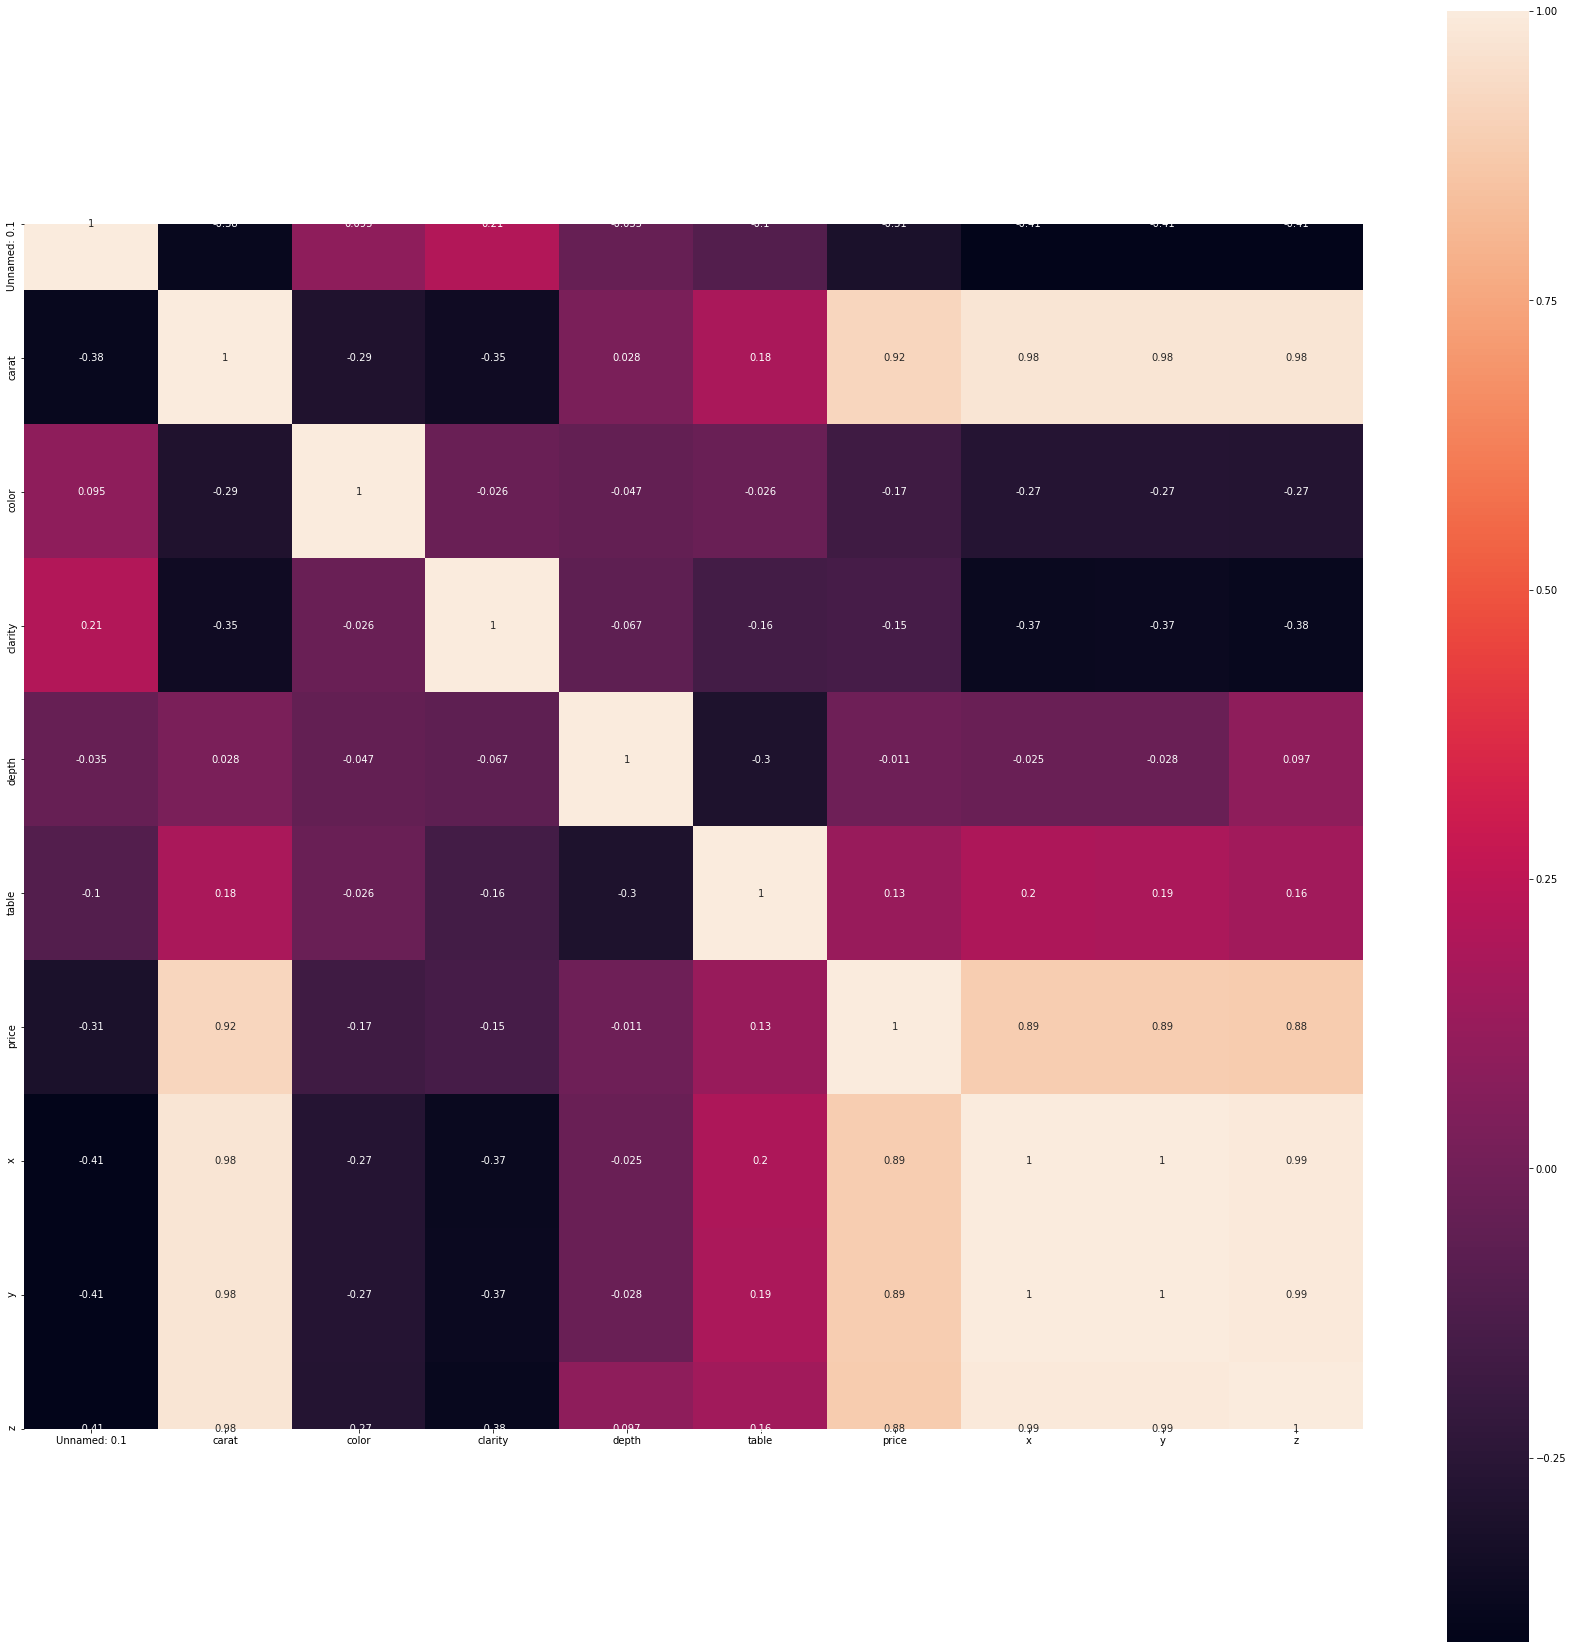

In [20]:
plt.figure(figsize=(30, 30))
p = sns.heatmap(diamonds.corr(), annot=True, square=True)

**What do you see here? Regarding the results before, does it fit with them?**

In [ ]:
#your thoughts here
# Yes, it seems like the correlations identified before are now represented in the heatmap with lighter colors. 

Finally, we will calculate the linear regression between the price and the weight. This will be done first by plotting it with the `seaborn` library and then calculating the error with the `scipy` library.

In [31]:
# your code here
import numpy as np
from sklearn.linear_model import LinearRegression

X = np.array(diamonds['carat']).reshape(-1,1)
Y = np.array(diamonds['price']).reshape(-1,1)

lm = LinearRegression()
model = lm.fit(X,Y)

print("Intercept: ", lm.intercept_)
print("Coef: ", lm.coef_)

predictions  = lm.predict(X)



Intercept:  [-2256.42401088]
Coef:  [[7756.52942846]]


**What do you think?**

In [ ]:
#your thoughts here
# not sure how to calculate the error or waht to do with it. 

**Would you do any other checks on other features? Do you have any comments regarding `carat`?**

In [ ]:
#your thoughts here


**Conclusion**

**From our dataset** we can conclude that although `color` and `clarity` have a classification, and thus an assigned importance or weight, they do not influence the monetary value of a diamond in determining way. While it is true that different colors or clarities may have different prices, upon closer examination those variations in price seem to be linked to `carat` (weight) and its `dimensions`. In our analysis, the key factor to determining a diamond's value was placed solely in the aforementioned features, since we can see in our correlation coefficients and in the coefficient of determination that these features are closely related.